In [1]:
# use hdbscan to cluster the data
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 8.8 MB/s eta 0:00:00a 0:00:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for cython<3,>=0.27 from https://files.pythonhosted.org/packages/3f/d6/9eed523aeaca42acbaa3e6d3850edae780dc7f8da9df1bf6a2ceb851839c/Cython-0.29.36-py2.py3-none-any.whl.metadata
  Using cached Cython-0.29.36-py2.py3-none-any.whl.metadata (3.1 kB)
Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-macosx_11_0_arm64.whl size=634802 sha256=d66ec1b96c12fdeae4b7e8c3941f8949927ce17d47eaf5d10314cb585290491f
  Stored in directory: /Users/sebastiancavada/Library/Caches/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan


In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

import hdbscan

In [4]:
with open('embeddings_all.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"]
y = data["labels"]

In [5]:
print(x.shape)
print(x)

torch.Size([49984, 344])
tensor([[-4.0658,  0.4799,  0.2382,  ...,  0.1069,  0.6385, -0.6550],
        [-0.6265, -0.6888,  0.3135,  ...,  0.9682,  3.7766, -1.7888],
        [ 1.8558, -0.4909,  0.0466,  ..., -0.8001, -1.6884, -2.9808],
        ...,
        [-1.7552, -2.7167,  0.0688,  ...,  0.0928, -2.6108, -1.0271],
        [-4.9407, -0.0754,  0.2270,  ..., -0.3963,  6.9203,  1.0549],
        [-4.2442,  0.6847,  0.3223,  ...,  0.0873,  0.0090,  0.5538]])


In [16]:
x_1 = np.array(x[:5000, :], dtype=np.double)
print(x_1.shape)



(5000, 344)


In [242]:
#do PCA with 100 dimensions

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_1)
print(x_pca.shape)

(5000, 2)


In [254]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=40, min_samples=10, metric='euclidean', cluster_selection_method='leaf', cluster_selection_epsilon=0.1)
cluster_labels = clusterer.fit(x_pca)
print(np.unique(cluster_labels))

print(cluster_labels.shape)
print(np.unique(cluster_labels, return_counts=True))
print(cluster_labels)

[-1  0  1  2  3  4  5  6  7  8  9 10]
(5000,)
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), array([4191,   46,   47,   58,   49,   51,   46,   49,   82,   72,  164,
        145]))
[-1 10 -1 ... 10 -1 -1]


<Axes: ylabel='$\\lambda$ value'>

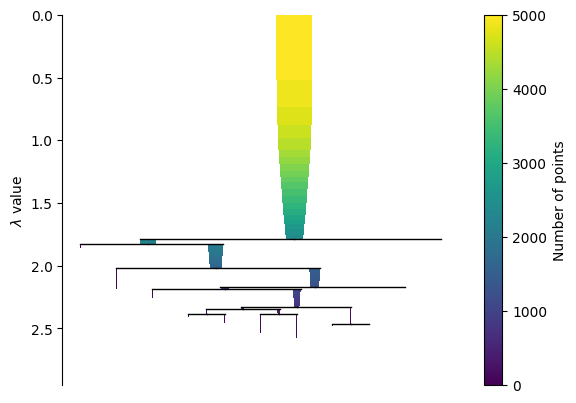

In [255]:
clusterer.condensed_tree_.plot()


In [248]:
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

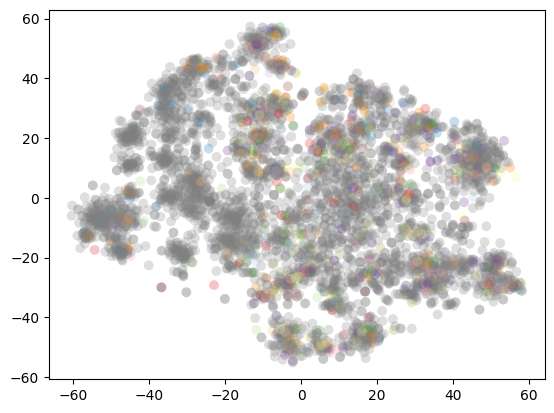

In [256]:
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in cluster_labels]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)